# TensorFlow Low-Level cheat sheet
> Some tips for tensorflow and keras custom layers and models

- toc: true 
- badges: true
- comments: true
- categories: [tensorflow, low-level]

![](ghtop_images/header2.png)

In [4]:
#hide
import numpy as np
import tensorflow as tf

# Overview

Custom Models and custom Layers share similar features. Both build on the implementation in the higher level code and both use `class` objects.

Hence, the first part of this looks at Classes. Then custom layers and custom models are considered.

Custom layers and models give us greater control over the nature of the models. They can be useful when using the higher level methods either make coding a complicated implementation either difficult or impossible.

# Classes

[Classes](https://docs.python.org/3/tutorial/classes.html) 
> Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state.


- `init` When a class defines an `__init__()` method, class instantiation automatically invokes `__init__()` for the newly created class instance. 
- `def` Define functions for the class
- `super()` returns a temporary object of the superclass (proxy object) that allows us to acces methods of the base class
- Python classes have an attribute called `__dict__` which gives a Python dictionary containing the object's instance variables and values as key value pairs
- You can also get the dictionary by calling `vars` on an instance of the class
- You can add a new variable to a class object
    - e.g. `my_class_obj.var_new = 2`
    - or `vars(my_class_obj)[var_new2 = 3`


In [1]:
#hide
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class MyClass:
    def __init__(self):
        self.var1 = 1
my_class_obj = MyClass()

print(f"my_class_obj.__dict__ = {my_class_obj.__dict__}\
      \nvars(my_class_obj) = {vars(my_class_obj)}")
print()

my_class_obj.var2 = 2
vars(my_class_obj)['var3'] = 3

print(vars(my_class_obj))

my_class_obj.__dict__ = {'var1': 1}      
vars(my_class_obj) = {'var1': 1}

{'var1': 1, 'var2': 2, 'var3': 3}


# Custom Layers

What is a layer? A layer is defined by:
1. State
    - variables such as weights that can be trainable
1. Computation
    - transoform batch of inputs to outputs
    - typically called *forward pass*
    
For example, for a Dense Layer
1. State => weights w (often called the kernel) and bias c
2. Computation => output = (w*inputs + c)

## Coding custom layer

A layer class is inherited from Kera's `Layer` class. Hence, `MyLayer(Layer):`

1. `def __init__(self, units=32):`

Initializes the class, accepts parameters and sets up internal variables.

`super().__init__()` returns a temporary object of the superclass (proxy object) the `Layer` class. This allows us to acces methods of the base class.
- make sure to pass class name and self in super()
- or `**kwargs`

Then `build` and `call` functions can be added to create the layer and when it is called. N.B. build can often be moved to `__init__`.

2. `def build(self, input_shape):`
    - runs when instance is created 
    - creates state of layers (weights)
3. `def call(self, inputs):`
    - call does the computation
    
The values for the parameters can be explicitly set using functions like `tf.random_normal_initializer()` and sepcifying a shape.

The key to `call` is defining how the parts in `build` and `__init__` are put together to create the computation of the layer.

Also note that in the call the format is the same as for the [functional API](https://thomashsimm.com/tensorflow/2022/09/28/Tensorflow.html#Functional-API), where the previous layer is added at the end of the next layer.

All the variables (weights and biases) can also be accesed with `layer_class.variables`.

In [3]:
# Create a custom layer
from tensorflow.keras.layers import Layer
import tensorflow as tf

class SimpleDense(Layer):
    
    def __init__(self,units=32):
        super(SimpleDense, self).__init__()
        self.units = units
        
    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
                initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                trainable=True,name='kernel',
                                )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
                initial_value=b_init(shape=(self.units), dtype='float32'),
                trainable=True, name='bias',
                                )
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
dense_layer = SimpleDense(units=32)

x = tf.ones((1,1))

print(dense_layer(x) )
print()
print(f"Weights = {dense_layer.weights[0].numpy()} \n\nand biases {dense_layer.weights[1].numpy()}")
print()
print([ var.numpy() for var in dense_layer.variables])

tf.Tensor(
[[-0.07436698 -0.02011585  0.05582675  0.05404044  0.02519816  0.02855827
   0.00046192  0.01360966  0.04663334  0.04556176  0.04592257  0.04647708
  -0.03950281 -0.00014847 -0.03248019  0.08354251  0.07218082 -0.01156685
   0.04577427 -0.06801199 -0.02725383 -0.02071865  0.08600459 -0.00035707
  -0.03410981  0.00493511 -0.05133317 -0.12937713 -0.13792662 -0.01709494
  -0.05110807 -0.01718794]], shape=(1, 32), dtype=float32)

Weights = [[-0.07436698 -0.02011585  0.05582675  0.05404044  0.02519816  0.02855827
   0.00046192  0.01360966  0.04663334  0.04556176  0.04592257  0.04647708
  -0.03950281 -0.00014847 -0.03248019  0.08354251  0.07218082 -0.01156685
   0.04577427 -0.06801199 -0.02725383 -0.02071865  0.08600459 -0.00035707
  -0.03410981  0.00493511 -0.05133317 -0.12937713 -0.13792662 -0.01709494
  -0.05110807 -0.01718794]] 

and biases [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

[array([[-0.07436698, -0.02011585,  0.

Or equivalently...

In [ ]:
# Create a custom layer
from tensorflow.keras.layers import Layer
import tensorflow as tf

class MyLayer(Layer):
    
    def __init__(self,units,input_dim):
        super(MyLayer, self).__init__()
        self.w = self.add_weight(shape=(input_dim,units),
                                initializer='random_normal',
                                trainable=True)
        self.b = self.add_weight(shape=(units,),
                                 initializer='zeros',
                                trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
dense_layer = MyLayer(3,5)

x = tf.ones((1,5))

print(dense_layer(x) )
print()
print(f"Weights = {dense_layer.weights[0].numpy()} \n\nand biases {dense_layer.weights[1].numpy()}")


## Create a Dropout layer as a custom layer

N.B. uses [`tf.nn`](https://www.tensorflow.org/api_docs/python/tf/nn) primitive Neural Net (NN) Operations.

In [ ]:
class MyDropout(Layer):

    def __init__(self, rate):
        super(MyDropout, self).__init__()
        self.rate = rate
        
    def call(self, inputs):
        # Define forward pass for dropout layer
        return tf.nn.dropout(inputs, rate=self.rate)

## Add activation functions

To add activation functions in the layer

- add `activation=None` to the `__init__` inputs so it accepts an activation but defaults to None if doesn't recieve one
- add the activation to the `self` variable
    - use `self.activation = tf.keras.activations.get(activation)`
    - i.e. so we can pass a string or a function
- call the activation function within the `call`
    - i.e. `return  self.activation(tf.matmul(inputs, self.w)+self.b)`

## Custom layers in a model

Can create the model by passing the layer into `keras.Sequential` as a list. In the same way as done with other layer elements.

In [4]:
xs = np.arange(-1,5,dtype=float)
ys = xs*2 -1

model = tf.keras.Sequential([SimpleDense(units=1)])

model.compile(optimizer='sgd',loss='mse')
model.fit(xs,ys,epochs=500,verbose=0)
print(model.predict([10.]))

[[18.981386]]


# Custom Models

Similar to custom layers, but using the class `Model` passed to the class

Can use existing model functions like `model.fit`, `model.save` etc

Custom Models are useful when models have more exotic architectures - such as when recursion (where the solution depends on solutions to smaller instances of the same problem) or architexture can change on the fly are used. 

Similar to custom layers, but using the class `Model` passed to the class.

Benefits of Custom Models:
- Extends existing models and similar framework used
    - e.g. model functions like `model.fit`, `model.save` etc
- USe same code used in functional and sequential code
- Modular architecture, allows to swap things around without repacing the entirety
- Try experiments quickly, e.g. quickly see the effect of the number of Conv2D layers on the results
- Can use branches and loops

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Softmax, concatenate, Layer

class MyModel(Model):
    
    def __init__(self):
        super(MyModel,self).__init__()
        self.Dense_1 = Dense(64,activation='relu')
        self.Dense_2 = Dense(10,activation='relu')
    def call(self,inputs):
        x = self.Dense_1(inputs)
        return self.Dense_2(x)

## Model example Residual Networks

![](ghtop_images/resnet__.png)

In [4]:
from tensorflow.keras.layers import Conv2D, Dense, Layer
import tensorflow as tf
from tensorflow.keras.models import Model

class CNNResidual(Layer):
    def __init__(self, layers, filters, **kwargs):
        super(**kwargs).__init__()
        self.hidden = [Conv2D(filters, (3,3), activation='relu') for _ in range(layers)]
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        return inputs + x
    
class DNNResidual(Layer):
    def __init__(self, layers, neurons, **kwargs):
        super(**kwargs).__init__()
        self.hidden = [Dense(neurons, activation='relu') for _ in range(layers)]
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        return inputs + x

class MyResidual(Model):
    def __init(self, **kwargs):
        self.hidden1 = Dense(30, activation='relu')
        self.block1 = CNNResidual(2, 32)
        self.block2 = DNNResidual(2, 64)
        self.out = Dense(1)
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.block1(x)
        for _ in range(1,4):
            x = self.block2(x)
        return self.out(x)
           


# Multiple layer model Optimization

For multiple layers it is the same but we need to iterate over the layers too.

If we put the gradients part within it's own function, putting `@tf.function` before that unction to speed things up.


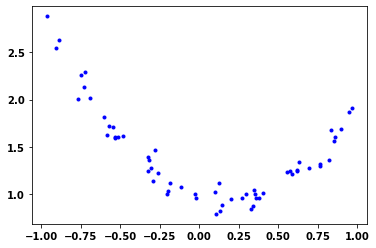

In [5]:
# Create data from a noise contaminated mixed model

def MakeNoisyData2(m, b, n=60):
    x = tf.random.uniform(shape=(n,))*2 -1
    noise = tf.random.normal(shape=(len(x),), stddev=0.09)
    y = m * x**2 -  np.exp(x/2) + b + noise
    return x, y

m=1.5
b=2
x_train, y_train = MakeNoisyData2(m,b)
plt.plot(x_train, y_train, 'b.')


x_train = tf.reshape(x_train,(len(x_train),1))
y_train = tf.reshape(y_train,(len(x_train),1))

Define the model class (see also [TensorFlow Low-Level cheat sheet](https://thomashsimm.com/tensorflow/low-level/2022/10/10/Tensorflow-CustomLayersModels.html))

In [6]:
#collapse-hide
# Define the custom layers and model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax
class MyLayer(Layer):
    
    def __init__(self,units):
        super(MyLayer, self).__init__()
        self.units = units     
    def build(self,input_shape):
        self.w = self.add_weight(shape=(input_shape[-1],self.units),
                                initializer='random_normal',
                                trainable=True,
                                name ='kernel')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                trainable=True,
                                name = 'bias')       
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
    
class MyDropout(Layer):

    def __init__(self, rate):
        super(MyDropout, self).__init__()
        self.rate = rate
    def call(self, inputs):
        # Define forward pass for dropout layer
        return tf.nn.dropout(inputs, rate=self.rate)
    
    
class MyModel(Model):

    def __init__(self, units_1, units_2, units_3):
        super(MyModel, self).__init__()
        # Define layers
        self.layer_1 = MyLayer(units_1)  
        self.dropout_1 = MyDropout(0.)
        self.layer_2 = MyLayer(units_2)
        self.dropout_2 = MyDropout(0.)
        self.layer_3 = MyLayer(units_3)
#         self.softmax = Softmax()
        
    def call(self, inputs):
        # Define forward pass
        x = self.layer_1(inputs)
        x = tf.nn.relu(x)
        x = self.dropout_1(x)
        x = self.layer_2(x)
        x = tf.nn.relu(x)
        x = self.dropout_2(x)
        x = self.layer_3(x)
        
        return x

In [7]:
model = MyModel(10, 10, 1)
model(x_train)
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer (MyLayer)           multiple                  20        
_________________________________________________________________
my_dropout (MyDropout)       multiple                  0         
_________________________________________________________________
my_layer_1 (MyLayer)         multiple                  110       
_________________________________________________________________
my_dropout_1 (MyDropout)     multiple                  0         
_________________________________________________________________
my_layer_2 (MyLayer)         multiple                  11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


#### Define the loss function and optimizer


In [8]:
# Define the loss and SGD optimizer

loss_object = tf.keras.losses.MeanAbsoluteError()

def loss(model, x, y, wd):
    kernel_variables = []
    for l in model.layers:
        for w in l.weights:
            if 'kernel' in w.name:
                kernel_variables.append(w)
    wd_penalty = wd * tf.reduce_sum([tf.reduce_sum(tf.square(k)) for k in kernel_variables])
    y_ = model(x)
    print(y_)
    return loss_object(y_true=y, y_pred=y_) + wd_penalty

optimizer = tf.keras.optimizers.SGD(learning_rate=0.07)



#### Define the function to do forward and backward passes

In [9]:
# Define a function to compute the forward and backward pass
@tf.function
def grad(model, inputs, targets, wd):
    with tf.GradientTape() as tape:
        # forward pass
        loss_value = loss(model, inputs, targets, wd)
        # backward pass
        grads = tape.gradient(loss_value, model.trainable_variables)
    return loss_value, grads

#### Do the training

Update parameters with optimizer

`optimizer.apply_gradients(zip(grads, model.trainable_variables))`

Almost equivalent with what used before

`w.assign_sub(w_gradient * LEARNING_RATE)`

In [10]:
# Implement the training loop

from tensorflow.keras.utils import to_categorical
import time

start_time = time.time()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.batch(32)

train_loss_results = []
train_mae_results =[]

num_epochs=2000
weight_decay =0.005

for epoch in range(num_epochs):
    
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_mae = tf.keras.metrics.MeanAbsoluteError()
    
    # Training loop
    for x, y in train_dataset:
        # Optimise the model
        # do forward and backward pass
        loss_value, grads = grad(model, x, y, weight_decay)
        # update parameters with optimizer
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Compute current loss
        epoch_loss_avg(loss_value)
        # Compile predicted label to actual label
        epoch_mae(y, model(x))
        
    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_mae_results.append(epoch_mae.result())
    if epoch%200==0:
        print(f"Epoch {epoch:03d} : Loss {epoch_loss_avg.result():.3f}: MAE {100*epoch_mae.result():.2f}")
        
print("Duration :{:.3f}".format(time.time() - start_time))

Tensor("my_model/my_layer_2/add:0", shape=(32, 1), dtype=float32)
Tensor("my_model/my_layer_2/add:0", shape=(28, 1), dtype=float32)
Epoch 000 : Loss 1.380: MAE 130.79
Epoch 200 : Loss 0.362: MAE 35.93
Epoch 400 : Loss 0.360: MAE 35.68
Epoch 600 : Loss 0.177: MAE 14.99
Epoch 800 : Loss 0.120: MAE 8.39
Epoch 1000 : Loss 0.124: MAE 8.36
Epoch 1200 : Loss 0.117: MAE 8.54
Epoch 1400 : Loss 0.147: MAE 10.81
Epoch 1600 : Loss 0.131: MAE 10.22
Epoch 1800 : Loss 0.126: MAE 8.36
Duration :37.492


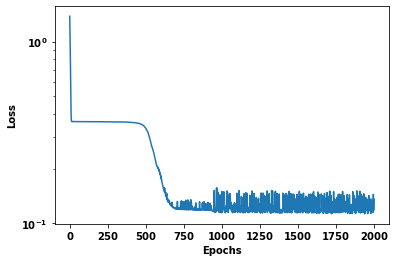

In [11]:
plt.semilogy(train_loss_results)
plt.ylabel('Loss')
plt.xlabel('Epochs');

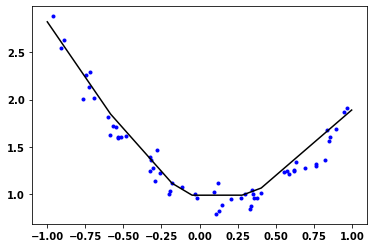

In [12]:
x_pred = np.arange(-1,1,.001)
y_pred = model.predict(x_pred)
plt.plot(x_train, y_train, 'b.')
plt.plot(x_pred, y_pred, 'k-');


# Custom Loss Function

In [2]:
import tensorflow.keras.backend as K
def my_rmse(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))
    return K.sqrt( mse )

The loss function expects two parameters, `y_true` and `y_pred`, so it is not possible to pass a 3rd parameter (threshold) to the loss function itself. 

This can be achieved by 
- creating a wrapper function around the original loss function
- with custome loss class where the parameter is passed on initilization

A loss function that applies a lower loss to values above a threshold value


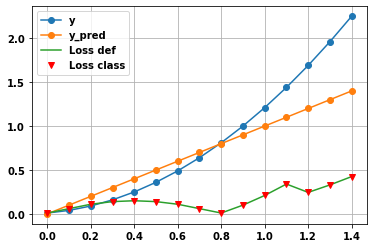

In [5]:
import tensorflow as tf

def my_rmse_with_threshold(threshold):
    def my_rmse(y_true, y_pred):
        error = K.abs( y_true - y_pred )
        bool_small = tf.abs(y_true) <= threshold
        error_big = error / 2
        
        return tf.where(bool_small, error, error_big)
    return my_rmse
    
from tensorflow.keras.losses import Loss

class My_rmseLoss(Loss):
    threshold=1
    
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
    def call(self, y_true, y_pred):
        threshold = self.threshold
        error = K.abs( y_true - y_pred )
        bool_small = tf.abs(y_true) <= threshold
        error_big = rmse / 2
        
        return tf.where(bool_small, error, error_big)

import matplotlib.pyplot as plt
x = K.arange(0,1.5,.1)
y = np.square( x+.1 )
y_pred = x
plt.plot(x,y,'o-')
plt.plot(x,y_pred,'o-')

loss_1 = my_rmse_with_threshold(1.5)
plt.plot(x,loss_1(y, y_pred))

loss_2 = My_rmseLoss(1.5)
plt.plot(x,loss_1(y, y_pred),'rv')
plt.legend(['y','y_pred','Loss def','Loss class'])
plt.grid(True)